In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler



sns.set_context("notebook", font_scale=1.25,rc={"lines.linewidth": 2.5})

from Novel_Metrics_and_Plotting_utils import *
from metrics import *
from data_loader import *

In [ ]:
##plot Diversity and Burden Data
label_type = "Cohort_2" #"Calm or peaceful"
base_folder = "SNAPSHOT_Sleep_results"
label_name = label_type
graph_type = "SMS_graph"
num_nodes = 34
# Compute metrics
metrics_df = analyze_time_metrics_for_strategiesSNAP(base_folder, label_name, graph_type,num_nodes, L=8, k=9, gap_threshold=5)
# Remove rows with specified strategies
strategies_to_remove = ['upper_bound_AL', 'uncertainty_entropy', 'uncertainty_least_confidence']
metrics_df = metrics_df[~metrics_df['strategy'].isin(strategies_to_remove)].reset_index(drop=True)
# Rename 'uncertainty' to 'uncertainty_margin'
metrics_df['strategy'] = metrics_df['strategy'].replace({'uncertainty_margin': 'uncertainty'})


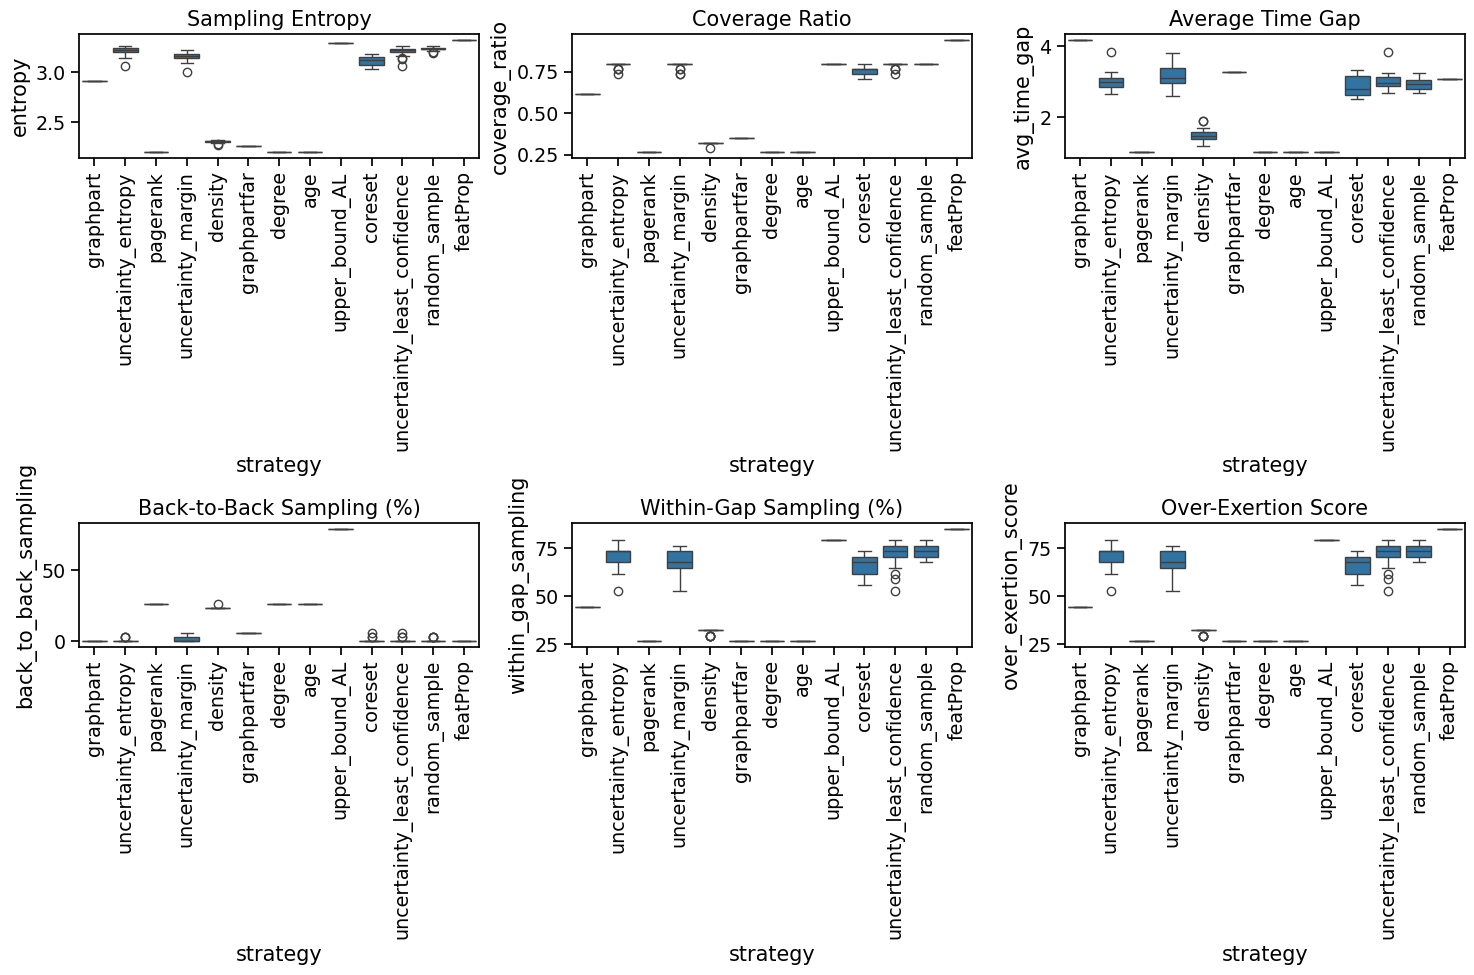

In [101]:

# Function to compare and visualize metrics
def visualize_metrics(metrics_df):
    plt.figure(figsize=(15, 10))

    # Entropy comparison
    plt.subplot(2, 3, 1)
    sns.boxplot(data=metrics_df, x="strategy", y="entropy")
    plt.title("Sampling Entropy")
    plt.xticks(rotation=90)

    # Coverage ratio comparison
    plt.subplot(2, 3, 2)
    sns.boxplot(data=metrics_df, x="strategy", y="coverage_ratio")
    plt.title("Coverage Ratio")
    plt.xticks(rotation=90)

    # Average time gap comparison
    plt.subplot(2, 3, 3)
    sns.boxplot(data=metrics_df, x="strategy", y="avg_time_gap")
    plt.title("Average Time Gap")
    plt.xticks(rotation=90)

    # Back-to-back sampling comparison
    plt.subplot(2, 3, 4)
    sns.boxplot(data=metrics_df, x="strategy", y="back_to_back_sampling")
    plt.title("Back-to-Back Sampling (%)")
    plt.xticks(rotation=90)

    # Within-gap sampling comparison
    plt.subplot(2, 3, 5)
    sns.boxplot(data=metrics_df, x="strategy", y="within_gap_sampling")
    plt.title("Within-Gap Sampling (%)")
    plt.xticks(rotation=90)

    # Over-exertion score comparison
    plt.subplot(2, 3, 6)
    sns.boxplot(data=metrics_df, x="strategy", y="over_exertion_score")
    plt.title("Over-Exertion Score")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Save metrics if needed
if metrics_df is not None:
    metrics_df.to_csv(os.path.join(base_folder, "time_metrics_comparison_with_bootstrap_iter.csv"), index=False)
    visualize_metrics(metrics_df)


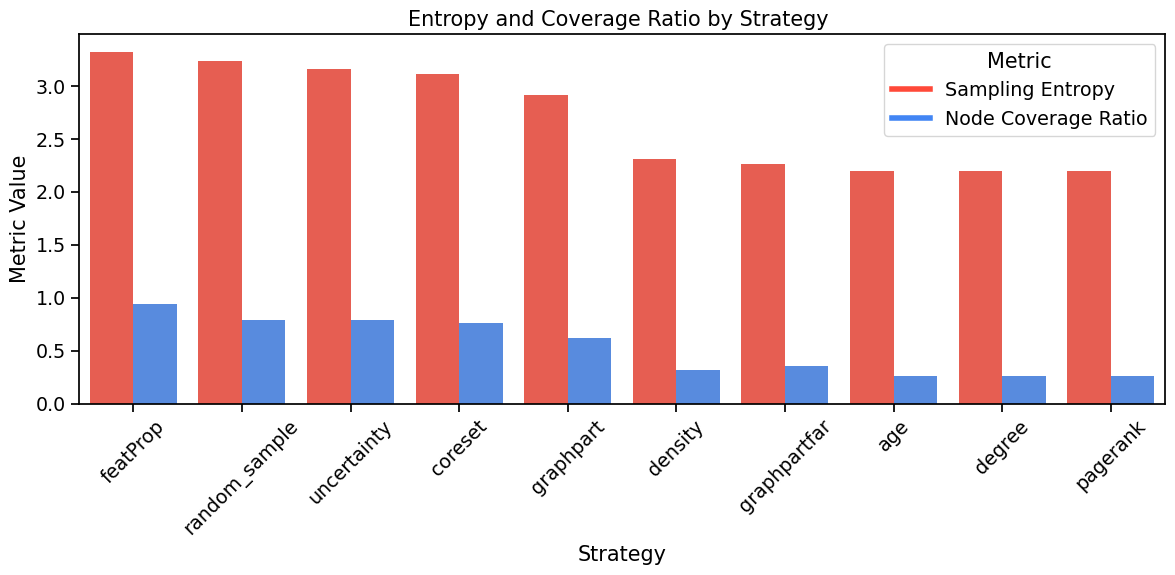

In [5]:


def plot_entropy_coverage_bar_chart(metrics_df):
    # Calculate mean entropy and coverage_ratio for each strategy across bootstraps
    summary_df = metrics_df.groupby('strategy')[['entropy', 'coverage_ratio']].mean().reset_index()

    # Sort the data by mean entropy in descending order
    summary_df = summary_df.sort_values(by='entropy', ascending=False)
    
    # Melt the data to long format for Seaborn
    summary_long_df = summary_df.melt(id_vars='strategy', value_vars=['entropy', 'coverage_ratio'], 
                                      var_name='Metric', value_name='Value')

    # Define the custom color palette using Google's red and blue
    google_palette = ['#ff4939', '#4285F4']  # Red and Blue colors from Google's logo

    # Create the grouped bar chart with sorted strategies
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary_long_df, x='strategy', y='Value', hue='Metric', 
                palette=google_palette,
                order=summary_df['strategy'])  # Order strategies by sorted entropy

    # Customize the plot
    plt.xlabel('Strategy')
 
    plt.ylabel('Metric Value')
    plt.title('Entropy and Coverage Ratio by Strategy ')
    plt.xticks(rotation=45)
   # Create custom legend handles with correct colors
    handles = [plt.Line2D([0], [0], color=google_palette[0], lw=4),
               plt.Line2D([0], [0], color=google_palette[1], lw=4)]
    labels = ["Sampling Entropy", "Node Coverage Ratio"]
    
    # Update legend with custom handles and labels
    plt.legend(handles=handles, labels=labels, title="Metric")


    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_entropy_coverage_bar_chart(metrics_df)


/var/folders/_m/k69y2y316331v5rsyhpwrbgc0000gp/T/ipykernel_4173/1401887915.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


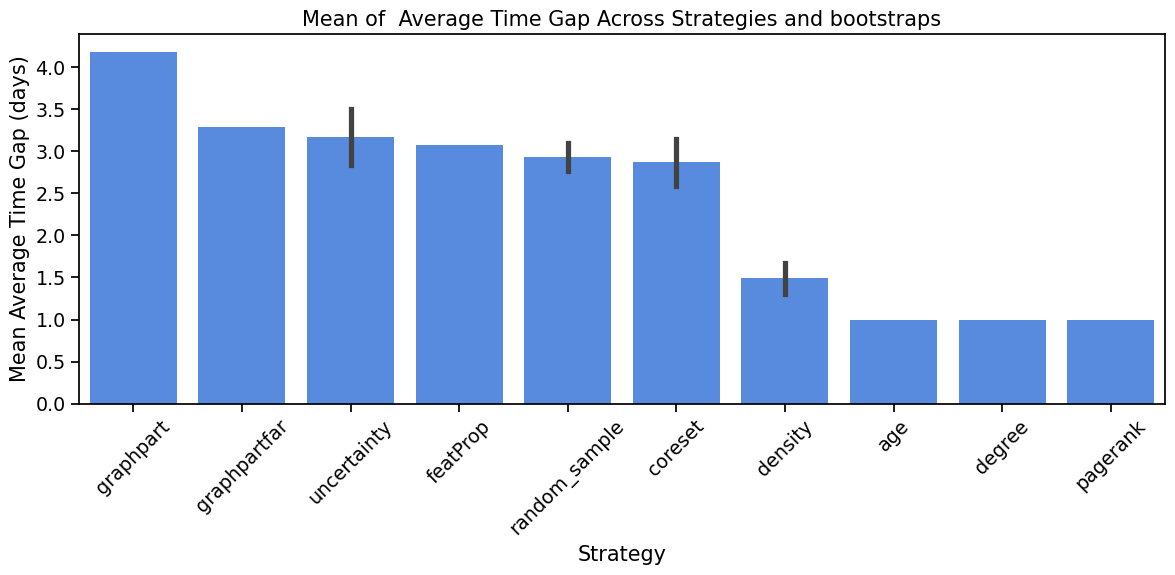

/var/folders/_m/k69y2y316331v5rsyhpwrbgc0000gp/T/ipykernel_4173/1401887915.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


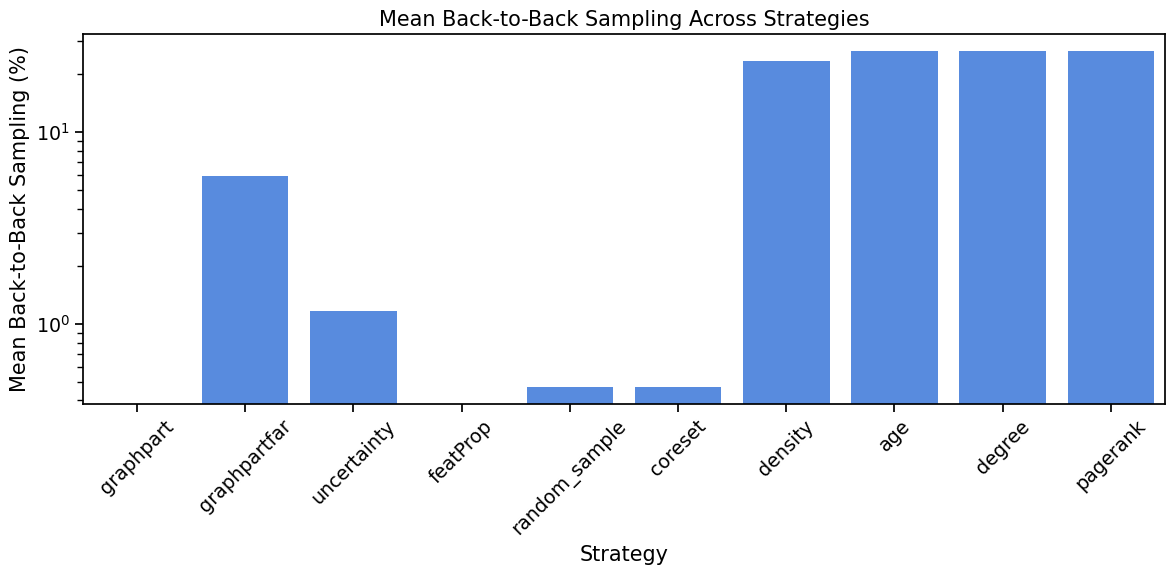

In [ ]:
# Sort strategies by mean of `avg_time_gap` for consistent order in both plots
sorted_strategies = metrics_df.groupby('strategy')['avg_time_gap'].mean().sort_values(ascending=False).index
blue_color = '#4285F4'  #  blue color
# Plot 1: Average Time Gap
plt.figure(figsize=(12, 6))
sns.barplot(
    data=metrics_df, x='strategy', y='avg_time_gap', order=sorted_strategies, color=blue_color, ci="sd", estimator=np.mean
)

plt.title("Mean of  Average Time Gap Across Strategies and bootstraps")
plt.xlabel("Strategy")
plt.ylabel("Mean Average Time Gap (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Back-to-Back Sampling
plt.figure(figsize=(12, 6))
sns.barplot(
    data=metrics_df, x='strategy', y='back_to_back_sampling', order=sorted_strategies, color=blue_color, ci=None, estimator=np.mean
)
plt.yscale('log')  # Set y-axis to log scale
plt.title("Mean Back-to-Back Sampling Across Strategies")
plt.xlabel("Strategy")
plt.ylabel("Mean Back-to-Back Sampling (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


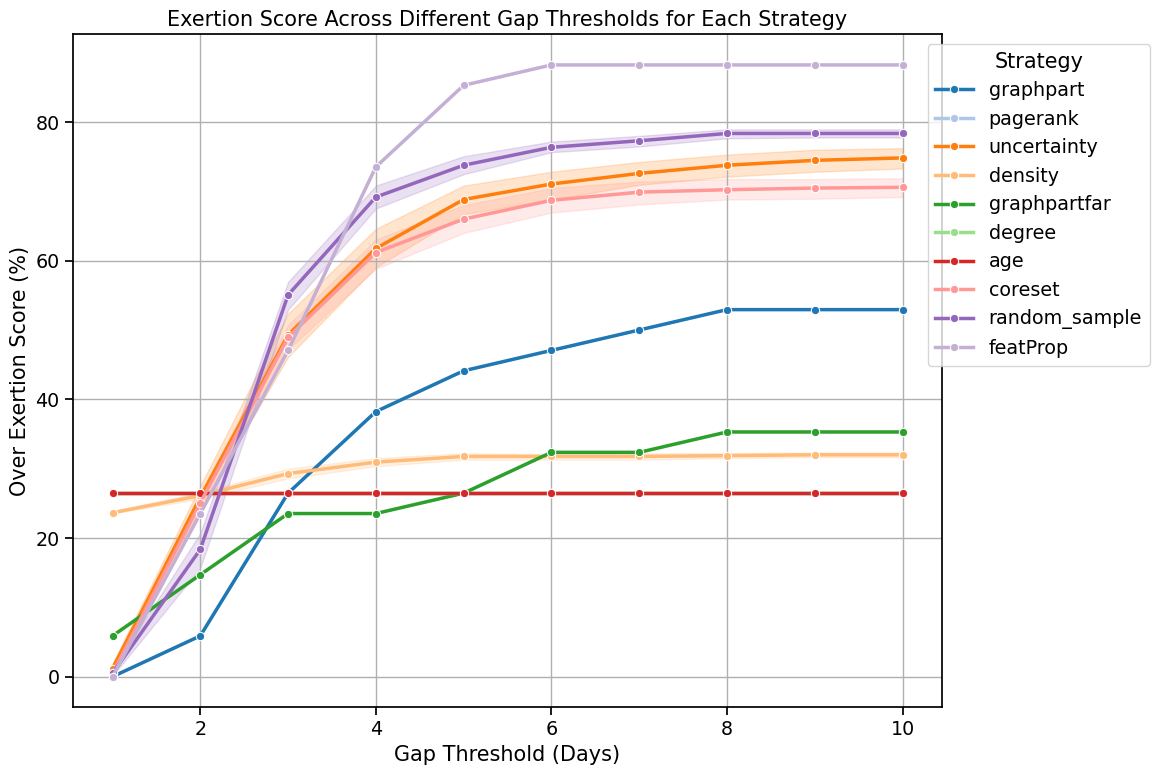

In [ ]:
# Function to plot exertion score by gap threshold for each strategy
def plot_exertion_score_by_gap(exertion_df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=exertion_df,
        x='gap_threshold',
        y='over_exertion_score',
        hue='strategy',
        marker='o',
        palette='tab20'
    )
    
    # Customize the plot
    plt.title("Exertion Score Across Different Gap Thresholds for Each Strategy")
    plt.xlabel("Gap Threshold (Days)")
    plt.ylabel("Over Exertion Score (%)")
    plt.legend(title="Strategy", loc="upper right", bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

L = 8
k = 9
num_nodes = 34

# Compute exertion score for multiple gap thresholds
exertion_df = analyze_exertion_for_multiple_gaps(base_folder, L, k, num_nodes, gap_thresholds=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
strategies_to_remove = ['upper_bound_AL', 'uncertainty_entropy', 'uncertainty_least_confidence']
exertion_df = exertion_df[~exertion_df['strategy'].isin(strategies_to_remove)].reset_index(drop=True)
# Rename 'uncertainty' to 'uncertainty_margin'
exertion_df['strategy'] = exertion_df['strategy'].replace({'uncertainty_margin': 'uncertainty'})
# Plot the exertion score by gap threshold for each strategy
if exertion_df is not None:
    plot_exertion_score_by_gap(exertion_df)


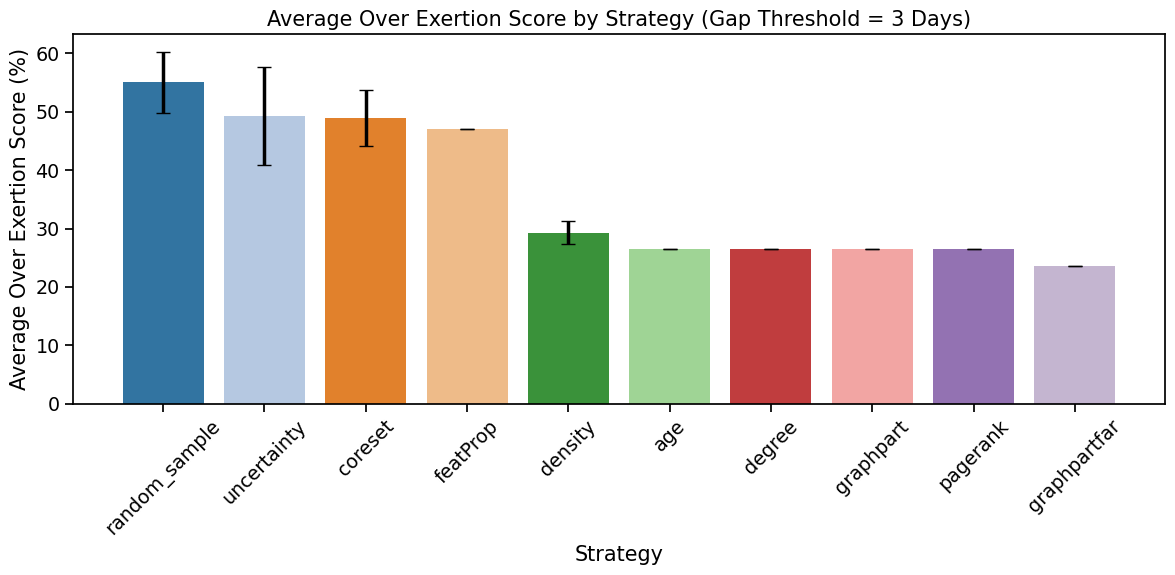

In [ ]:
# Filter the DataFrame for a fixed gap threshold (e.g., 3 days)
fixed_threshold_df = exertion_df[exertion_df['gap_threshold'] == 3]

# Calculate the mean and standard deviation of over_exertion_score for each strategy
exertion_means = fixed_threshold_df.groupby("strategy")["over_exertion_score"].mean()
exertion_stds = fixed_threshold_df.groupby("strategy")["over_exertion_score"].std()

# Reset index to use strategy as a categorical hue and add standard deviation as a separate column
exertion_means_df = exertion_means.reset_index()
exertion_means_df['std'] = exertion_stds.values

# Sort by mean over exertion score
exertion_means_df = exertion_means_df.sort_values(by="over_exertion_score", ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=exertion_means_df, x="strategy", y="over_exertion_score", hue="strategy", palette="tab20", dodge=False)
plt.errorbar(x=exertion_means_df["strategy"], y=exertion_means_df["over_exertion_score"], yerr=exertion_means_df["std"], fmt='none', c='black', capsize=5)

plt.title("Average Over Exertion Score by Strategy (Gap Threshold = 3 Days)")
plt.xlabel("Strategy")
plt.ylabel("Average Over Exertion Score (%)")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Hide the hue legend since it's redundant
plt.tight_layout()
plt.show()


In [ ]:
## Conduct a centrality vs burden analysis
# Function to load user sampling log files for all strategies
def load_user_sampling_log(base_folder, L, k, num_nodes):
    folder_path = os.path.join(
        base_folder,
        f"L_{L}_k_{k}_nodes_{num_nodes}",
        "user_log"
    )

    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return None

    user_sampling_log_by_strategy = {}

    strategies = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]
    for strategy in strategies:
        strategy_folder = os.path.join(folder_path, strategy)
        
        user_sampling_log = []
        for filename in os.listdir(strategy_folder):
            if filename.startswith("bootstrap_") and filename.endswith("_user_log.csv"):
                file_path = os.path.join(strategy_folder, filename)
                daily_log_df = pd.read_csv(file_path)
                
                bootstrap_iter = filename.split('_')[1]
                daily_log_df['sampled_users'] = daily_log_df['sampled_users'].apply(eval)
                daily_log_df['strategy'] = strategy
                daily_log_df['bootstrap_iter'] = bootstrap_iter
                user_sampling_log.extend(daily_log_df.to_dict(orient='records'))
        
        user_sampling_log_by_strategy[strategy] = user_sampling_log
    
    return user_sampling_log_by_strategy
# Function to compute multiple centralities for each user
def compute_all_centralities(G):
    centrality_metrics = {}
    centrality_metrics['degree'] = nx.degree_centrality(G)
    centrality_metrics['betweenness'] = nx.betweenness_centrality(G, normalized=True)
    
    # Only compute eigenvector centrality if the graph is connected
    if nx.is_connected(G):
        centrality_metrics['eigenvector'] = nx.eigenvector_centrality_numpy(G)
    else:
        centrality_metrics['eigenvector'] = {node: np.nan for node in G.nodes()}
    
    centrality_metrics['closeness'] = nx.closeness_centrality(G)
    centrality_metrics['pagerank'] = nx.pagerank(G)
    centrality_metrics['harmonic'] = nx.harmonic_centrality(G)
    centrality_metrics['load'] = nx.load_centrality(G)
    centrality_metrics['clustering'] = nx.clustering(G)
    
    return centrality_metrics


def compute_centrality_and_sampling_metrics_from_adjacency(adjacency_matrix, user_sampling_log, strategy, gap_threshold=2):
    G = nx.from_numpy_array(adjacency_matrix)
    centrality_metrics = compute_all_centralities(G)

    time_gaps = defaultdict(list)
    within_gap_sampling = defaultdict(int)
    sampling_frequency = defaultdict(int)
    user_centralities = defaultdict(dict)
    
    # Outer dictionary to accumulate sampling days for each user across all day_logs
    all_user_sampling_days = defaultdict(list)

    for day_log in user_sampling_log:
        sampled_users = day_log['sampled_users']
        
        for user in sampled_users:
            # Collect each user's sampling days over time
            all_user_sampling_days[user].append(day_log['day'])
            sampling_frequency[user] += 1
            
            # Accumulate centrality metrics for each user
            for metric_name, metric_values in centrality_metrics.items():
                user_centralities[user].setdefault(metric_name, []).append(metric_values[user])

    # Calculate time gaps only after collecting all sampling days
    for user, days_sampled in all_user_sampling_days.items():
        if len(days_sampled) > 1:
            gaps = np.diff(sorted(days_sampled))  # Sort to ensure correct order of days
            time_gaps[user].extend(gaps)
            within_gap_sampling[user] += np.sum(gaps <= gap_threshold)

    # Calculate the metrics for each user
    user_stats = []
    for user, gaps in time_gaps.items():
        total_samples = len(gaps) + 1
        within_gap_percentage = (within_gap_sampling[user] / total_samples) * 100
        avg_gap = np.mean(gaps) if len(gaps) > 0 else np.nan
        sample_frequency = sampling_frequency[user]

        centrality_means = {metric_name: np.mean(user_centralities[user][metric_name]) if user in user_centralities else np.nan
                            for metric_name in centrality_metrics.keys()}

        user_stat_entry = {
            'user': user,
            'total_samples': total_samples,
            'within_gap_percentage': within_gap_percentage,
            'avg_gap': avg_gap,
            'over_exertion_score': within_gap_percentage,
            'sampling_frequency': sample_frequency,
            'strategy': strategy,
            'bootstrap_iter': user_sampling_log[0]['bootstrap_iter']  # Assuming same bootstrap_iter for simplicity
        }
        user_stat_entry.update(centrality_means)
        user_stats.append(user_stat_entry)

    user_stats_df = pd.DataFrame(user_stats)
    return user_stats_df


base_folder = "/SNAPSHOT_Sleep_results/Cohort_2/SMS_graph"
L = 8
k = 9
num_nodes = 34
file_path = 'Dataset/SNAPSHOT/gnn_data_all_cohorts.pkl'
output = load_data(dataset='SNAPSHOT',file_path='gnn_data_all_cohorts.pkl')
adjacency_matrix = output[2]['A']


# Load user sampling log for all strategies
user_sampling_logs = load_user_sampling_log(base_folder, L, k, num_nodes)

# Placeholder for consolidated metrics
all_user_stats_df = pd.DataFrame()

if user_sampling_logs:
    for strategy, user_sampling_log in user_sampling_logs.items():
        user_stats_df = compute_centrality_and_sampling_metrics_from_adjacency(adjacency_matrix, user_sampling_log, strategy, gap_threshold=5)
        all_user_stats_df = pd.concat([all_user_stats_df, user_stats_df], ignore_index=True)

print(all_user_stats_df.head())


consolidated_df = all_user_stats_df
strategies_to_remove = ['upper_bound_AL', 'uncertainty_entropy', 'uncertainty_least_confidence']
consolidated_df = consolidated_df[~consolidated_df['strategy'].isin(strategies_to_remove)].reset_index(drop=True)
# Rename 'uncertainty' to 'uncertainty_margin'
consolidated_df['strategy'] = consolidated_df['strategy'].replace({'uncertainty_margin': 'uncertainty'})


Loaded data successfully from /Users/maryamkhalid/Library/CloudStorage/OneDrive-RiceUniversity/One_Drive_local_version/Fall 2024/AL_evalutaion_SNAPSHOT_Nov15/Dataset/gnn_data_all_cohorts.pkl
   user  total_samples  within_gap_percentage   avg_gap  over_exertion_score  \
0     0            125              98.400000  0.112903            98.400000   
1    28            100              98.000000  0.161616            98.000000   
2    18             50              96.000000  0.265306            96.000000   
3    13            225              99.555556  0.071429            99.555556   
4    32            200              99.500000  0.085427            99.500000   

   sampling_frequency   strategy bootstrap_iter    degree  betweenness  \
0                 125  graphpart             18  0.030303     0.000000   
1                 100  graphpart             18  0.090909     0.021780   
2                  50  graphpart             18  0.272727     0.356692   
3                 225  graphpart

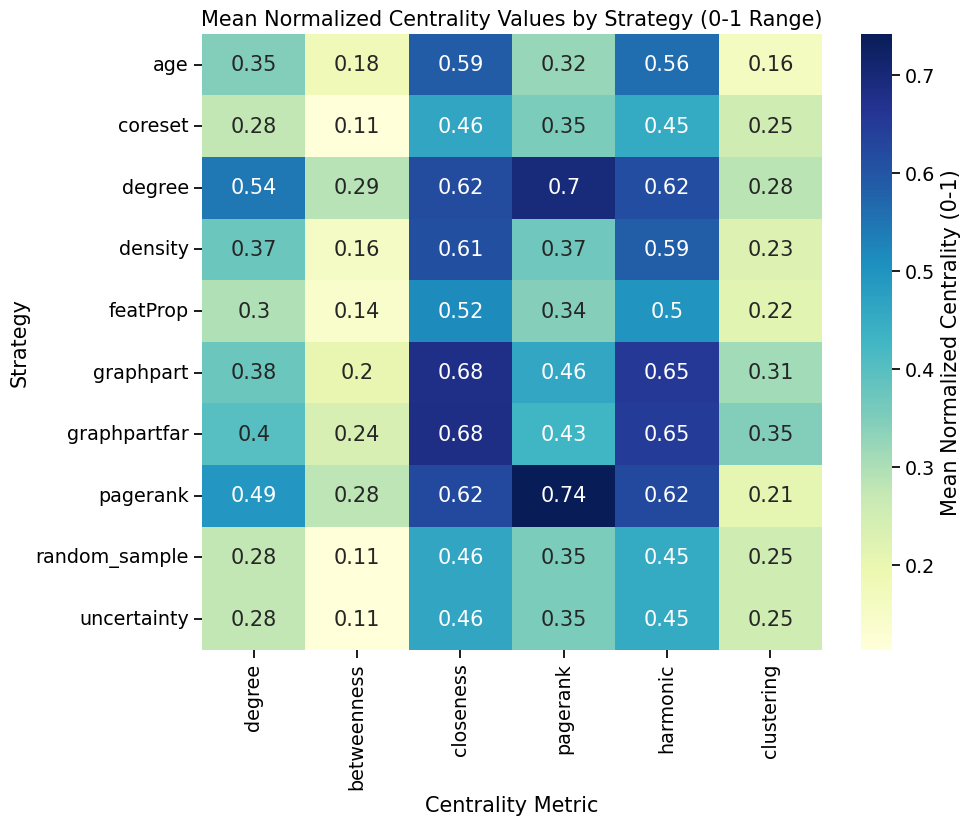

In [ ]:
# List of centrality metrics
centrality_metrics = ['degree',  'closeness', 'pagerank', 'harmonic',  'clustering']
centrality_metrics = ['degree', 'betweenness',  'closeness', 'pagerank', 'harmonic', 'clustering']

# Apply min-max normalization to centrality metrics for 0-1 range
scaler = MinMaxScaler()
normalized_centralities = pd.DataFrame(scaler.fit_transform(consolidated_df[centrality_metrics]), columns=centrality_metrics)

# Add back the strategy column for plotting
normalized_centralities['strategy'] = consolidated_df['strategy']

# Calculate the mean of each normalized centrality metric by strategy
mean_normalized_centrality_by_strategy = normalized_centralities.groupby('strategy')[centrality_metrics].mean().reset_index()

# Plot the heatmap of mean normalized centrality values by strategy
plt.figure(figsize=(10, 8))
sns.heatmap(mean_normalized_centrality_by_strategy.set_index('strategy'), annot=True, cmap='YlGnBu', cbar_kws={'label': 'Mean Normalized Centrality (0-1)'})
plt.title('Mean Normalized Centrality Values by Strategy (0-1 Range)')
plt.xlabel('Centrality Metric')
plt.ylabel('Strategy')
plt.show()

In [ ]:

import scipy.stats as stats

# Define exertion and centrality metrics
exertion_metrics = ['avg_gap', 'over_exertion_score', 'sampling_frequency']
centrality_metrics = ['degree', 'betweenness', 'closeness', 'pagerank', 'harmonic', 'load', 'clustering']

# Dictionary to store results
results = []

# Loop through each strategy
for strategy in consolidated_df['strategy'].unique():
    strategy_data = consolidated_df[consolidated_df['strategy'] == strategy]
    
    # Loop through each exertion metric and centrality metric
    for exertion in exertion_metrics:
        for centrality in centrality_metrics:
            # Calculate Pearson correlation and p-value
            corr, p_value = stats.pearsonr(strategy_data[exertion], strategy_data[centrality])
            
            # Store the result
            results.append({
                'Strategy': strategy,
                'Exertion Metric': exertion,
                'Centrality Metric': centrality,
                'Correlation': corr,
                'P-Value': p_value
            })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Apply a significance level (e.g., 0.05) to filter statistically significant results
significant_results = results_df[results_df['P-Value'] < 0.05]

# Display significant results
print("Significant relationships between exertion and centrality metrics by strategy:")
significant_results


Significant relationships between exertion and centrality metrics by strategy:


/var/folders/_m/k69y2y316331v5rsyhpwrbgc0000gp/T/ipykernel_27469/1935605019.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = stats.pearsonr(strategy_data[exertion], strategy_data[centrality])


,Strategy,Exertion Metric,Centrality Metric,Correlation,P-Value
27,uncertainty_entropy,avg_gap,clustering,-0.425145,0.027058
34,uncertainty_entropy,over_exertion_score,clustering,0.439430,0.021826
41,uncertainty_entropy,sampling_frequency,clustering,0.460055,0.015755
65,uncertainty_margin,avg_gap,closeness,0.525754,0.004855
67,uncertainty_margin,avg_gap,harmonic,0.502133,0.007610
69,uncertainty_margin,avg_gap,clustering,0.514447,0.006044
72,uncertainty_margin,over_exertion_score,closeness,-0.526930,0.004743
74,uncertainty_margin,over_exertion_score,harmonic,-0.503237,0.007457
76,uncertainty_margin,over_exertion_score,clustering,-0.515637,0.005908
79,uncertainty_margin,sampling_frequency,closeness,-0.634066,0.000383


In [37]:
# Divide significant results into separate tables for each exertion metric

# Separate DataFrames for each exertion metric
significant_avg_gap = significant_results[significant_results['Exertion Metric'] == 'avg_gap']
significant_over_exertion_score = significant_results[significant_results['Exertion Metric'] == 'over_exertion_score']


# Display each table
print("Significant Results for Avg Gap Exertion Metric")
print(significant_avg_gap)

print("\nSignificant Results for Over Exertion Score Exertion Metric")
print(significant_over_exertion_score)

Significant Results for Avg Gap Exertion Metric
                         Strategy Exertion Metric Centrality Metric  \
27            uncertainty_entropy         avg_gap        clustering   
65             uncertainty_margin         avg_gap         closeness   
67             uncertainty_margin         avg_gap          harmonic   
69             uncertainty_margin         avg_gap        clustering   
105                  graphpartfar         avg_gap            degree   
106                  graphpartfar         avg_gap       betweenness   
109                  graphpartfar         avg_gap          harmonic   
110                  graphpartfar         avg_gap              load   
216  uncertainty_least_confidence         avg_gap        clustering   

     Correlation   P-Value  
27     -0.425145  0.027058  
65      0.525754  0.004855  
67      0.502133  0.007610  
69      0.514447  0.006044  
105     0.669018  0.017355  
106     0.615118  0.033268  
109     0.635320  0.026420  
110     0

In [ ]:
output = load_data(dataset='SNAPSHOT',file_path='gnn_data_all_cohorts.pkl')
A1 = output[2]['A']

label_name = "sleep_class"
graph_type = "L_friend"

label_list = ["sleep_class"]
output_folder = '/Users/maryamkhalid/Library/CloudStorage/OneDrive-RiceUniversity/One_Drive_local_version/Fall 2024/Active Learning Benchmark_old/AL_Evaluation_Oct_30th/Dataset/Processed_XY_Graphs_oct18'

data_dict  = load_data('FnF',output_folder='Dataset/FnF')
A2 = data_dict['sleep_class']['L_friend']



Loaded data successfully from /Users/maryamkhalid/Library/CloudStorage/OneDrive-RiceUniversity/One_Drive_local_version/Fall 2024/AL_evalutaion_SNAPSHOT_Nov15/Dataset/gnn_data_all_cohorts.pkl
Loaded data for label: sleep_class


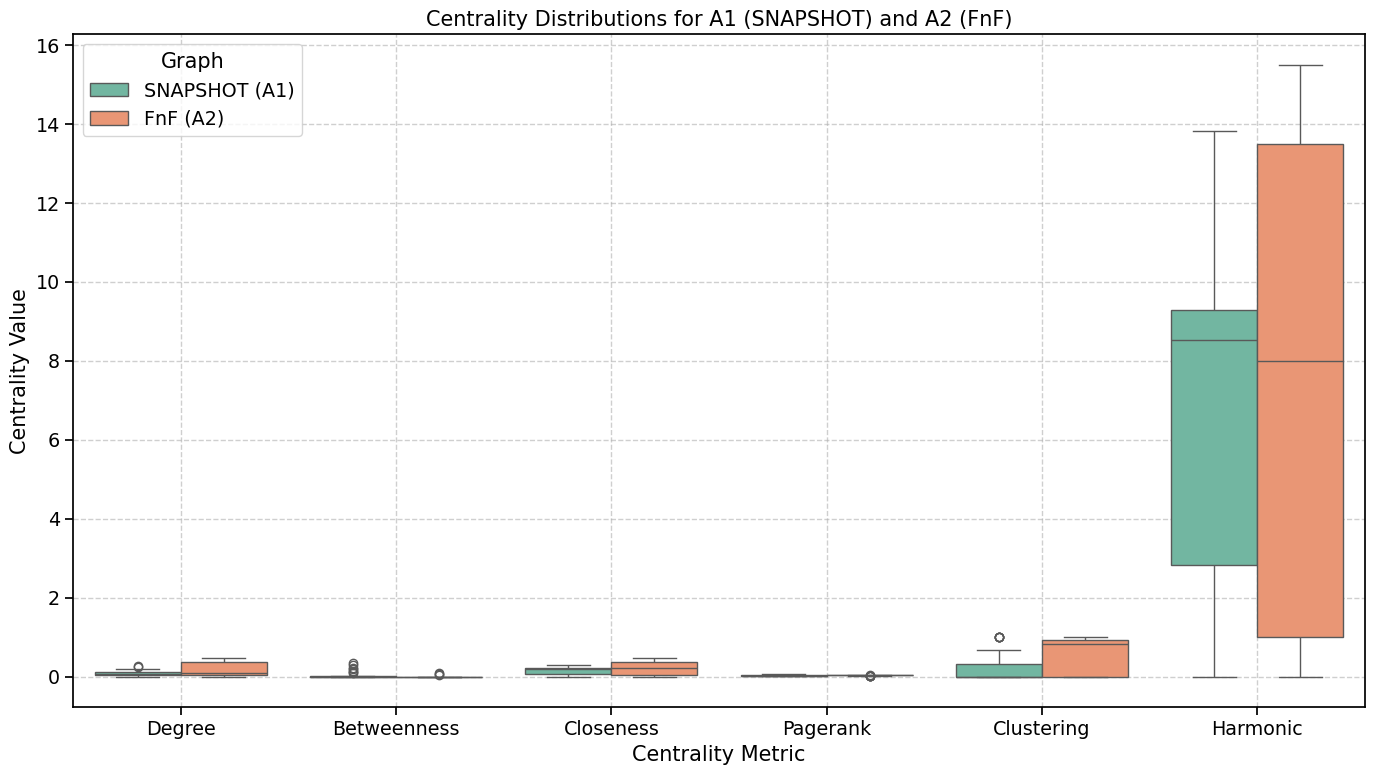

In [ ]:
# Create graphs from adjacency matrices
G_A1 = nx.from_numpy_array(A1)
G_A2 = nx.from_numpy_array(A2)

# Function to compute centralities
def compute_centralities(graph):
    centralities = {
        "Degree": list(nx.degree_centrality(graph).values()),
        "Betweenness": list(nx.betweenness_centrality(graph).values()),
        "Closeness": list(nx.closeness_centrality(graph).values()),
      
        "Pagerank": list(nx.pagerank(graph).values()),
        "Clustering": list(nx.clustering(graph).values()),
        "Harmonic": list(nx.harmonic_centrality(graph).values()),
    }
    return centralities

# Compute centralities for both graphs
centralities_A1 = compute_centralities(G_A1)
centralities_A2 = compute_centralities(G_A2)

# Convert centralities to DataFrames for visualization
data = []
for metric, values in centralities_A1.items():
    for value in values:
        data.append({"Graph": "SNAPSHOT (A1)", "Metric": metric, "Value": value})

for metric, values in centralities_A2.items():
    for value in values:
        data.append({"Graph": "FnF (A2)", "Metric": metric, "Value": value})

centrality_df = pd.DataFrame(data)

# Plot centrality distributions as box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=centrality_df, x="Metric", y="Value", hue="Graph", palette="Set2")

# Customize the plot
plt.title("Centrality Distributions for A1 (SNAPSHOT) and A2 (FnF)")
plt.xlabel("Centrality Metric")
plt.ylabel("Centrality Value")
plt.legend(title="Graph")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


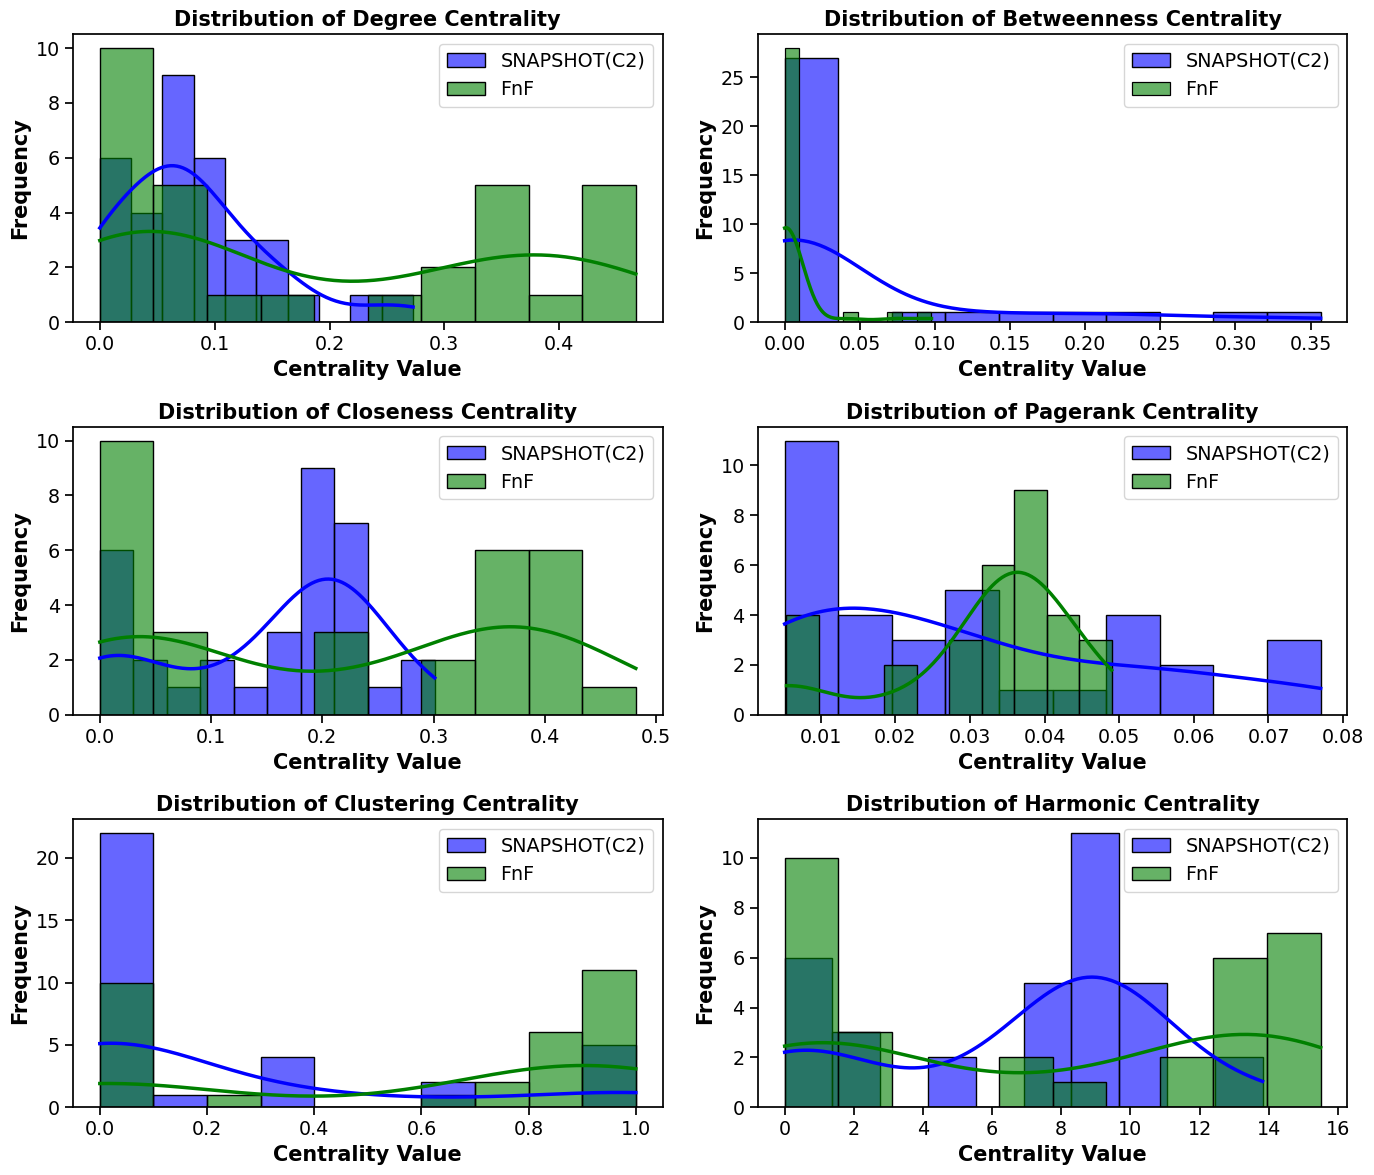

In [50]:

from scipy.stats import gaussian_kde
# Function to plot centrality distributions as subplots
def plot_centrality_distributions(centrality_A1, centrality_A2):
    metrics = centrality_A1.keys()
    num_metrics = len(metrics)
    fig, axes = plt.subplots(nrows=(num_metrics + 1) // 2, ncols=2, figsize=(14, 12))
    axes = axes.flatten()

    for idx, metric in enumerate(metrics):
        values_A1 = centrality_A1[metric]
        values_A2 = centrality_A2[metric]

        # Skip KDE if data is singular
        if len(set(values_A1)) <= 1 or len(set(values_A2)) <= 1:
            print(f"Skipping KDE for {metric} due to singular data.")
            kde_A1, kde_A2 = None, None
        else:
            kde_A1 = gaussian_kde(values_A1)
            kde_A2 = gaussian_kde(values_A2)
            x_range = np.linspace(
                min(min(values_A1), min(values_A2)),
                max(max(values_A1), max(values_A2)),
                100
            )

        # Plot bar distributions
        ax = axes[idx]
        sns.histplot(values_A1, kde=True, bins=10, color='blue', label='SNAPSHOT(C2)', alpha=0.6, ax=ax)
        sns.histplot(values_A2, kde=True, bins=10, color='green', label='FnF', alpha=0.6, ax=ax)

        # # Plot KDE curves if valid
        # if kde_A1 and kde_A2:
        #     ax.plot(x_range, kde_A1(x_range), color='blue', linestyle='--', label='A1 KDE')
        #     ax.plot(x_range, kde_A2(x_range), color='green', linestyle='--', label='A2 KDE')

        # Customize each subplot
        ax.set_title(f"Distribution of {metric} Centrality",weight="bold")
        ax.set_xlabel("Centrality Value",weight="bold")
        ax.set_ylabel("Frequency",weight="bold")
        ax.legend()

    # Remove empty subplots
    for idx in range(len(metrics), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

# Plot centrality distributions
plot_centrality_distributions(centralities_A1, centralities_A2)


In [ ]:
df2 = consolidated_df_fnf


In [ ]:

# Define exertion and centrality metrics
exertion_metrics = ['avg_gap', 'over_exertion_score', 'sampling_frequency']
centrality_metrics = ['degree', 'betweenness', 'closeness', 'pagerank', 'harmonic', 'load', 'clustering']

# Function to calculate correlations for a given dataset
def calculate_correlations(df, dataset_name):
    results = []
    for strategy in df['strategy'].unique():
        strategy_data = df[df['strategy'] == strategy]
        for exertion in exertion_metrics:
            for centrality in centrality_metrics:
                # Calculate Pearson correlation and p-value
                corr, p_value = stats.pearsonr(strategy_data[exertion], strategy_data[centrality])
                # Store the result
                results.append({
                    'Strategy': strategy,
                    'Exertion Metric': exertion,
                    'Centrality Metric': centrality,
                    'Correlation': corr,
                    'P-Value': p_value,
                    'Dataset': dataset_name
                })
    return pd.DataFrame(results)

# Load datasets

df2_results = calculate_correlations(df2, "Dataset 1")
results_df_results = calculate_correlations(consolidated_df, "Dataset 2")

# Pivot data for heatmaps
heatmap_data_1 = df2_results.pivot_table(index='Exertion Metric', columns='Centrality Metric', values='Correlation')
heatmap_data_2 = results_df_results.pivot_table(index='Exertion Metric', columns='Centrality Metric', values='Correlation')

# Compute differences
heatmap_difference = heatmap_data_2 - heatmap_data_1

# Plot Heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_1, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (Dataset 1)')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_2, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (Dataset 2)')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_difference, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Difference (Dataset 2 - Dataset 1)'})
plt.title('Correlation Difference Heatmap')
plt.show()


/var/folders/_m/k69y2y316331v5rsyhpwrbgc0000gp/T/ipykernel_27469/3169070460.py:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = stats.pearsonr(strategy_data[exertion], strategy_data[centrality])


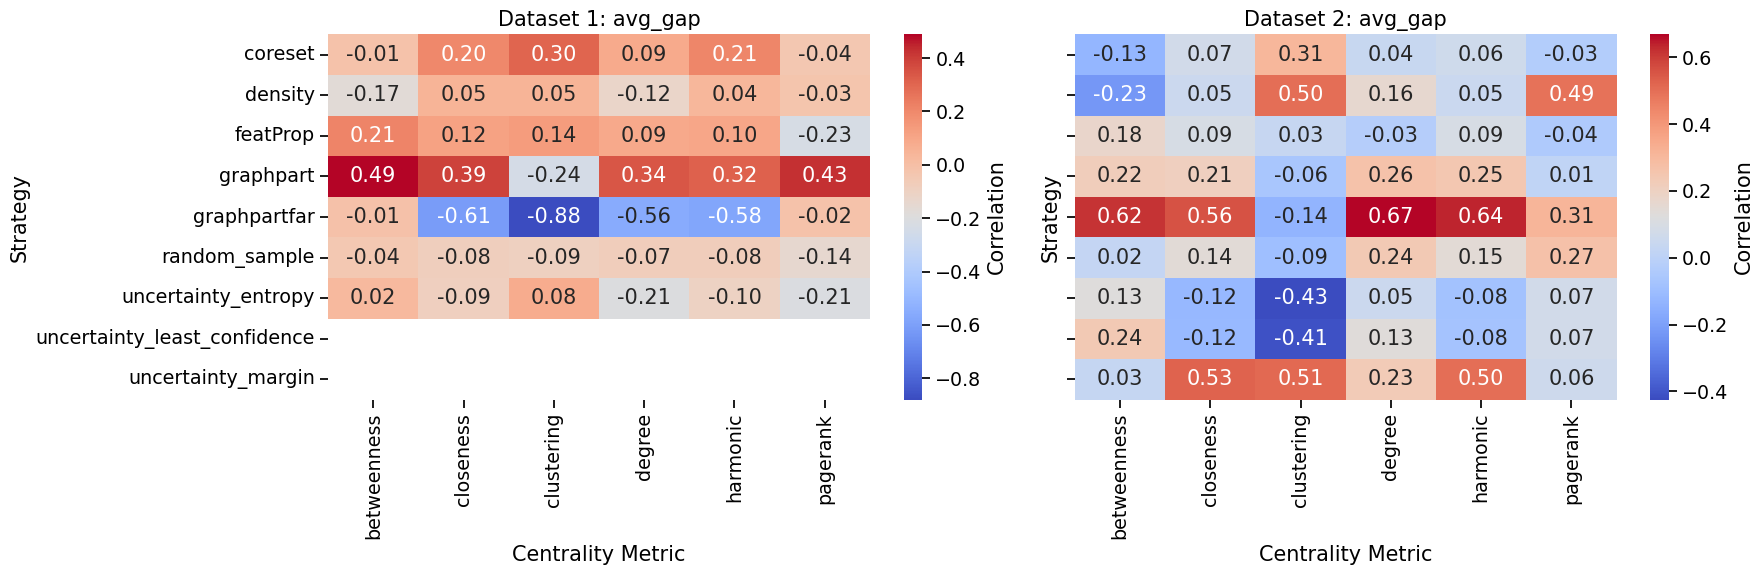

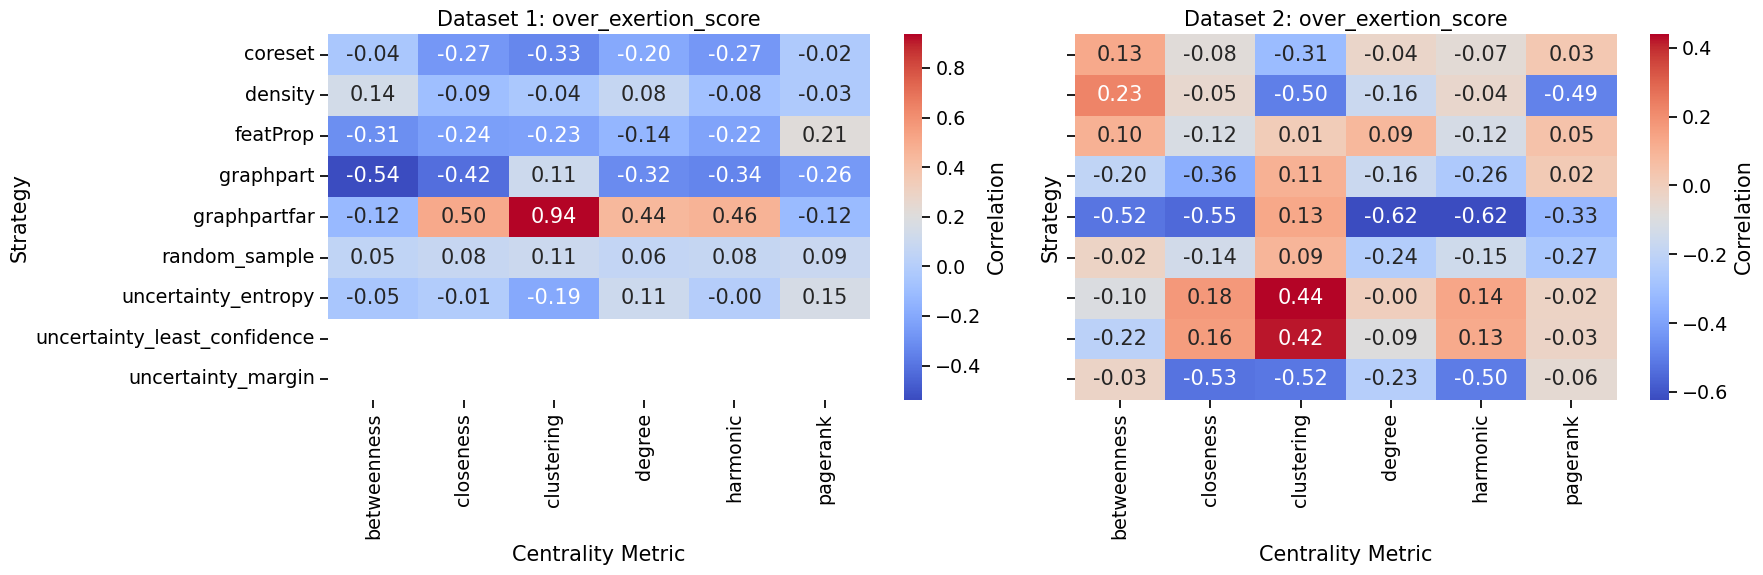

In [ ]:


# Define exertion and centrality metrics
exertion_metrics = ['avg_gap', 'over_exertion_score', 'sampling_frequency']
centrality_metrics = ['degree', 'betweenness', 'closeness', 'pagerank', 'harmonic', 'clustering']

# Function to calculate correlations for a given dataset
def calculate_correlations(df, dataset_name):
    results = []
    for strategy in df['strategy'].unique():
        strategy_data = df[df['strategy'] == strategy]
        for exertion in exertion_metrics:
            for centrality in centrality_metrics:
                try:
                    corr, p_value = stats.pearsonr(strategy_data[exertion], strategy_data[centrality])
                    results.append({
                        'Strategy': strategy,
                        'Exertion Metric': exertion,
                        'Centrality Metric': centrality,
                        'Correlation': corr,
                        'P-Value': p_value,
                        'Dataset': dataset_name
                    })
                except ValueError:  # Handle cases with insufficient data
                    results.append({
                        'Strategy': strategy,
                        'Exertion Metric': exertion,
                        'Centrality Metric': centrality,
                        'Correlation': 0,
                        'P-Value': 1,
                        'Dataset': dataset_name
                    })
    return pd.DataFrame(results)

# Load datasets
df2_results = calculate_correlations(df2, "Dataset 1")
results_df_results = calculate_correlations(consolidated_df, "Dataset 2")

# Function to filter and pivot data for a specific exertion metric
def prepare_heatmap_data(data, exertion_metric):
    filtered_data = data[data['Exertion Metric'] == exertion_metric]
    heatmap_data = filtered_data.pivot_table(
        index='Strategy',
        columns='Centrality Metric',
        values='Correlation',
        fill_value=0
    )
    return heatmap_data

# Prepare data for heatmaps
heatmap_data_1_avg_gap = prepare_heatmap_data(df2_results, 'avg_gap')
heatmap_data_2_avg_gap = prepare_heatmap_data(results_df_results, 'avg_gap')

heatmap_data_1_exertion = prepare_heatmap_data(df2_results, 'over_exertion_score')
heatmap_data_2_exertion = prepare_heatmap_data(results_df_results, 'over_exertion_score')

# Function to plot side-by-side heatmaps
def plot_side_by_side_heatmaps(data1, data2, title1, title2, cmap="coolwarm"):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    sns.heatmap(data1, annot=True, fmt=".2f", cmap=cmap, ax=axes[0], cbar_kws={'label': 'Correlation'})
    axes[0].set_title(title1)
    axes[0].set_xlabel("Centrality Metric")
    axes[0].set_ylabel("Strategy")

    sns.heatmap(data2, annot=True, fmt=".2f", cmap=cmap, ax=axes[1], cbar_kws={'label': 'Correlation'})
    axes[1].set_title(title2)
    axes[1].set_xlabel("Centrality Metric")

    plt.tight_layout()
    plt.show()

# Plot heatmaps for avg_gap
plot_side_by_side_heatmaps(
    heatmap_data_1_avg_gap, heatmap_data_2_avg_gap,
    "Dataset 1: avg_gap", "Dataset 2: avg_gap"
)

# Plot heatmaps for over_exertion_score
plot_side_by_side_heatmaps(
    heatmap_data_1_exertion, heatmap_data_2_exertion,
    "Dataset 1: over_exertion_score", "Dataset 2: over_exertion_score"
)


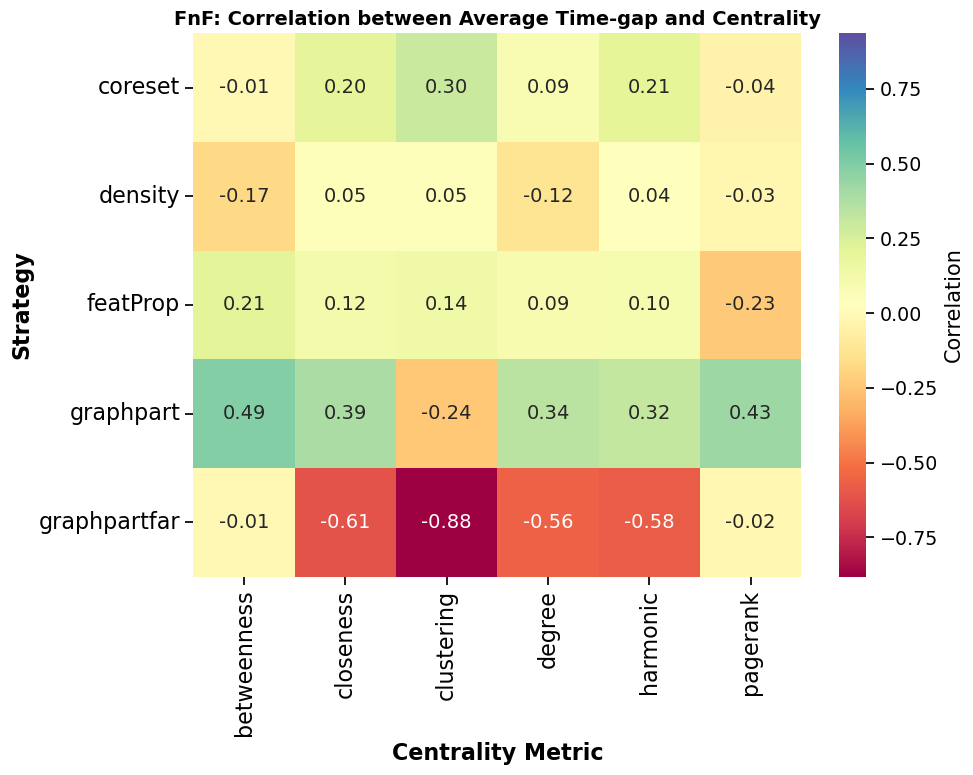

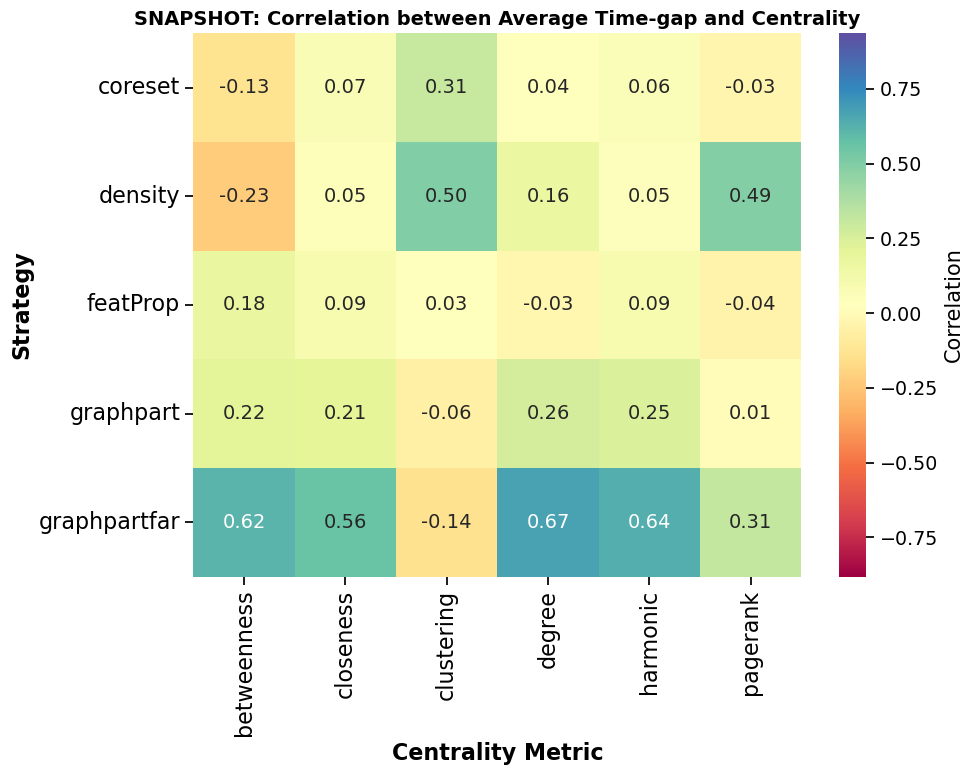

In [97]:
# Function to plot a single heatmap with enhanced font styling
def plot_single_heatmap(data, title, cmap="Spectral", vmin=None, vmax=None):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Correlation'},
                vmin=vmin, vmax=vmax, annot_kws={"size": 14})
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("Centrality Metric", fontsize=16, fontweight='bold')
    plt.ylabel("Strategy", fontsize=16, fontweight='bold')
    plt.yticks(rotation=0, fontsize=16)
    plt.xticks(fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot heatmap for FnF (Dataset 1)
plot_single_heatmap(
    heatmap_data_1_avg_gap, 
    "FnF: Correlation between Average Time-gap and Centrality", 
    vmin=global_min, vmax=global_max
)

# Plot heatmap for SNAPSHOT (Dataset 2)
plot_single_heatmap(
    heatmap_data_2_avg_gap, 
    "SNAPSHOT: Correlation between Average Time-gap and Centrality", 
    vmin=global_min, vmax=global_max
)
